# Chargement des données


In [24]:
!git clone https://github.com/Romain-Malinge/Deep_learning_groupe_A.git
path = "./Deep_learning_groupe_A/BD/"

fatal: destination path 'Deep_learning_groupe_A' already exists and is not an empty directory.


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import glob
import PIL
from PIL import Image
import numpy as np
from tensorflow.keras import optimizers
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras import regularizers

Voici ensuite un exemple de chargement de vos données. Notez que vous pouvez modifier la dimension des images, ce qui sera utile à différents stades de votre projet.

In [26]:
row = 192
col = 256

datagen = ImageDataGenerator(rescale=1./255)

train_dir = path + 'entrainement'
val_dir = path + 'validation'
test_dir = path + 'test'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(row,col),
    batch_size=20,
    class_mode='categorical'
)

Found 100000 images belonging to 4 classes.
Found 1000 images belonging to 4 classes.
Found 100 images belonging to 4 classes.


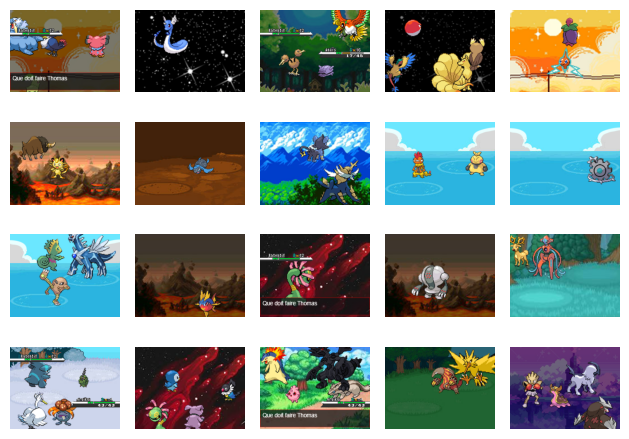

In [27]:
for i in range(20):
    img, label = train_generator.next()
    plt.subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow(img[0])


plt.tight_layout()
plt.show()

Vous pouvez utiliser le bloc suivant pour afficher quelques-unes de vos images, et ainsi vérifier que tout s'est bien passé.

#  Création de notre réseau de neurones

Dans un premier temps nous allons utiliser un réseau basique et voir les résultats.

In [28]:

model = Sequential()
# 1er couche
model.add(Conv2D(32, (3,3), input_shape = [row, col,3], activation='relu'))
model.add(MaxPooling2D(2,2))
# 2nd couche
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# 3eme couche
model.add(Conv2D(96, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# 4eme couche
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense


model.add(Dense(512, activation='relu')) # input_dim indique la dimension de la couche d'entrée, ici 512
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 190, 254, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 95, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 93, 125, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 46, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 60, 96)        55392     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 22, 30, 96)       

In [29]:
# Fonction cout
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy'])

In [30]:
# Analyse de notre modèle
history = model.fit(train_generator,
                    steps_per_epoch=200,
                    epochs=200,
                    validation_data=val_generator,
                    validation_steps=50,
                    verbose=2)

Epoch 1/200
200/200 - 23s - loss: 0.5487 - accuracy: 0.3195 - val_loss: 0.4889 - val_accuracy: 0.4460 - 23s/epoch - 116ms/step
Epoch 2/200
200/200 - 21s - loss: 0.4440 - accuracy: 0.5173 - val_loss: 0.3961 - val_accuracy: 0.6000 - 21s/epoch - 105ms/step
Epoch 3/200
200/200 - 20s - loss: 0.3833 - accuracy: 0.5915 - val_loss: 0.3570 - val_accuracy: 0.6570 - 20s/epoch - 98ms/step
Epoch 4/200
200/200 - 26s - loss: 0.3446 - accuracy: 0.6530 - val_loss: 0.3261 - val_accuracy: 0.6750 - 26s/epoch - 131ms/step
Epoch 5/200
200/200 - 21s - loss: 0.3228 - accuracy: 0.6750 - val_loss: 0.2959 - val_accuracy: 0.7310 - 21s/epoch - 104ms/step
Epoch 6/200
200/200 - 20s - loss: 0.2991 - accuracy: 0.7125 - val_loss: 0.2723 - val_accuracy: 0.7580 - 20s/epoch - 101ms/step
Epoch 7/200
200/200 - 19s - loss: 0.2943 - accuracy: 0.7140 - val_loss: 0.2532 - val_accuracy: 0.7630 - 19s/epoch - 96ms/step
Epoch 8/200
200/200 - 21s - loss: 0.2859 - accuracy: 0.7295 - val_loss: 0.2479 - val_accuracy: 0.7710 - 21s/epoch

In [31]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

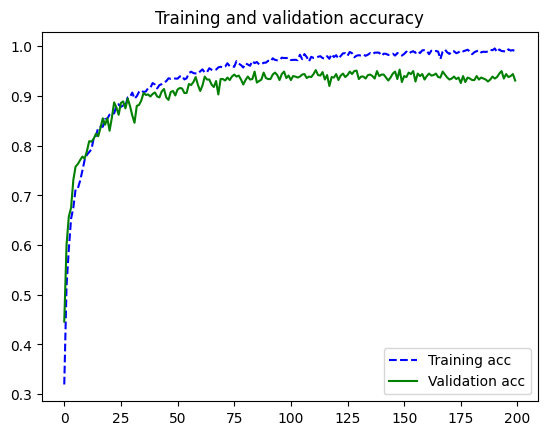

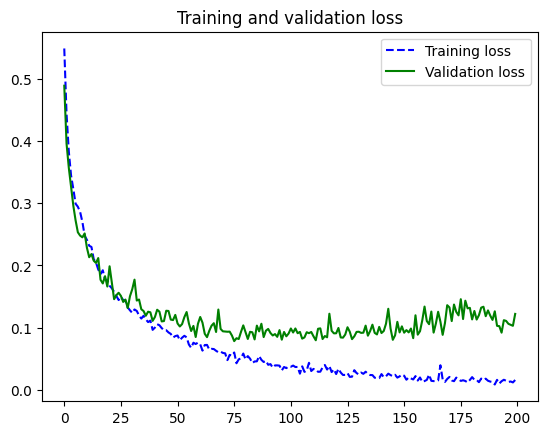

In [32]:
# Affichage du training
plot_training_analysis()

Pour les données de test, il faudra utiliser un evaluate.
Le code suivant ne fonctionne pas.


In [33]:
results = model.evaluate(test_generator)
print("test loss, test acc:", results)

5/5 [==============================] - 1s 158ms/step - loss: 4.1213 - accuracy: 0.3900
test loss, test acc: [4.1212639808654785, 0.38999998569488525]
